In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
sns.set_palette("PRGn")

In [18]:
df = pd.read_csv("./nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


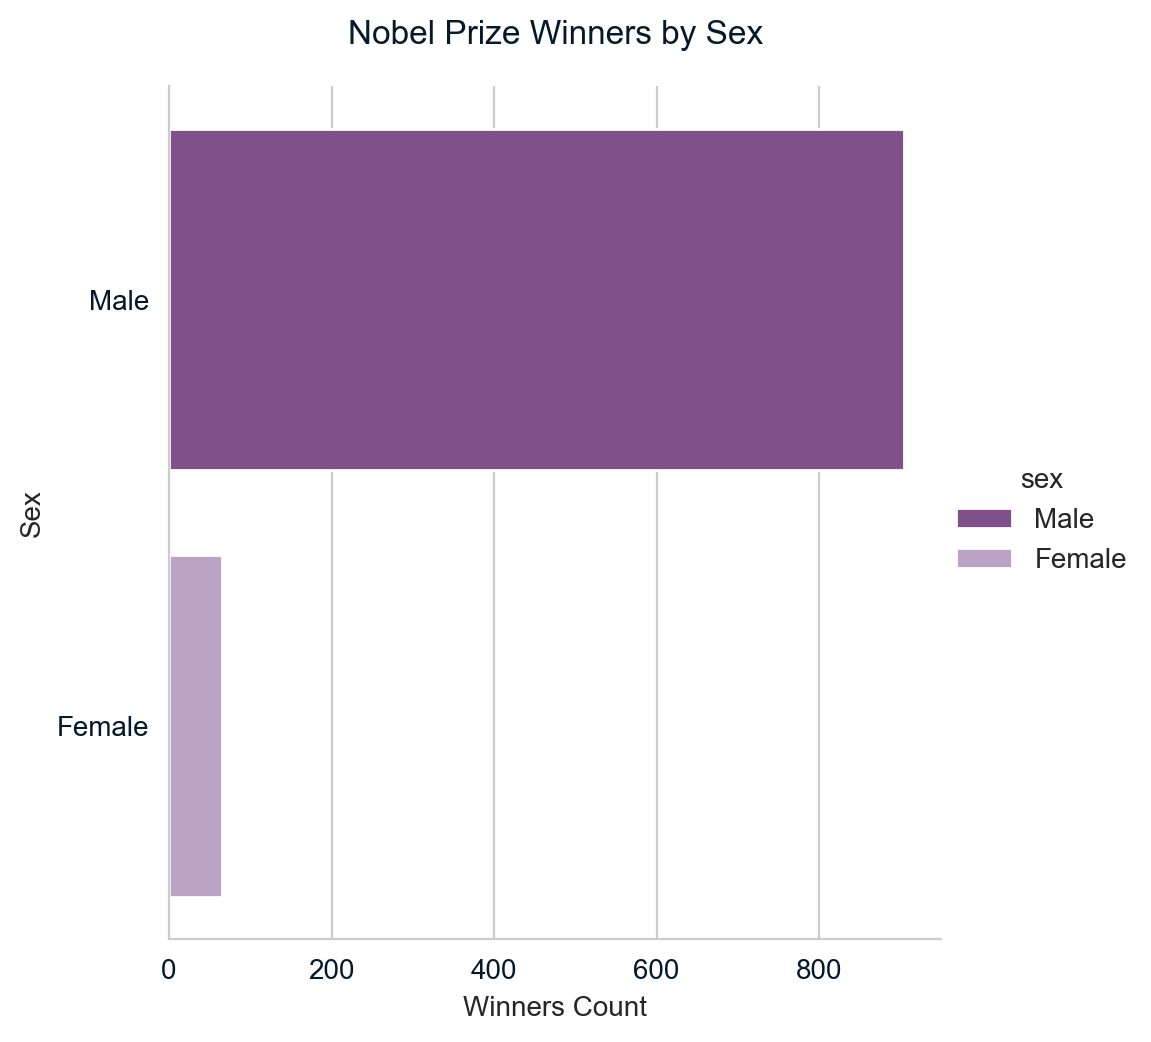

In [19]:
# What is the most commonly awarded gender?
sns.catplot(y='sex', kind='count', hue='sex', data=df)
plt.title('Nobel Prize Winners by Sex', y=1.03)
plt.xlabel('Winners Count')
plt.ylabel('Sex')
plt.show()
top_gender = df['sex'].value_counts().index[0]

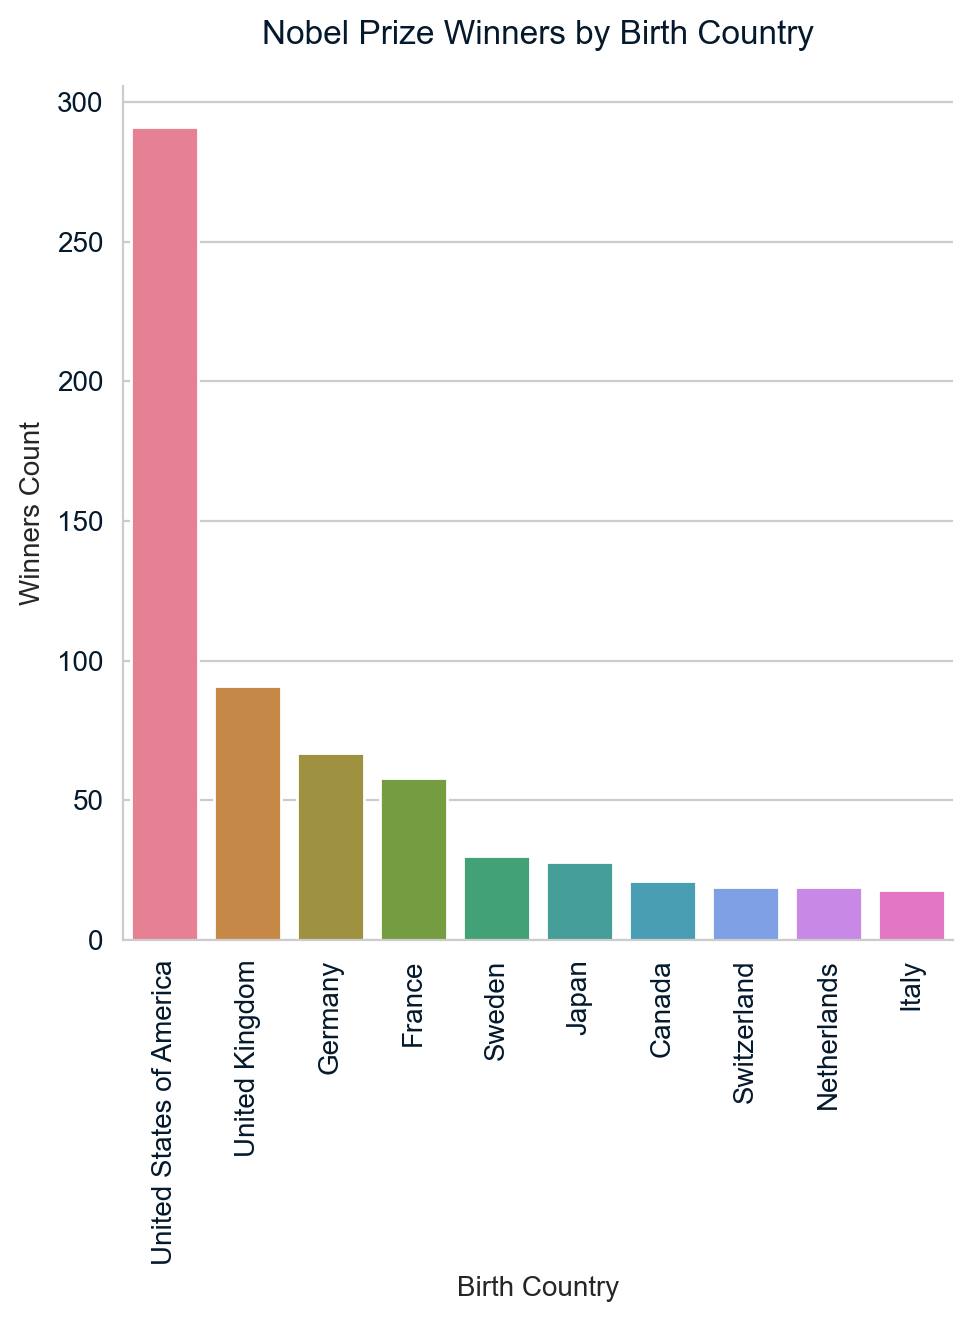

In [20]:
# What is the most commonly awarded birth country?
sns.catplot(x='index', y='birth_country', hue='index', kind='bar', data=df['birth_country'].value_counts().reset_index().head(10), legend=False)
plt.title('Nobel Prize Winners by Birth Country', y=1.03)
plt.xlabel('Birth Country')
plt.ylabel('Winners Count')
plt.xticks(rotation=90)
plt.show()
top_gender = df['birth_country'].value_counts().index[0]

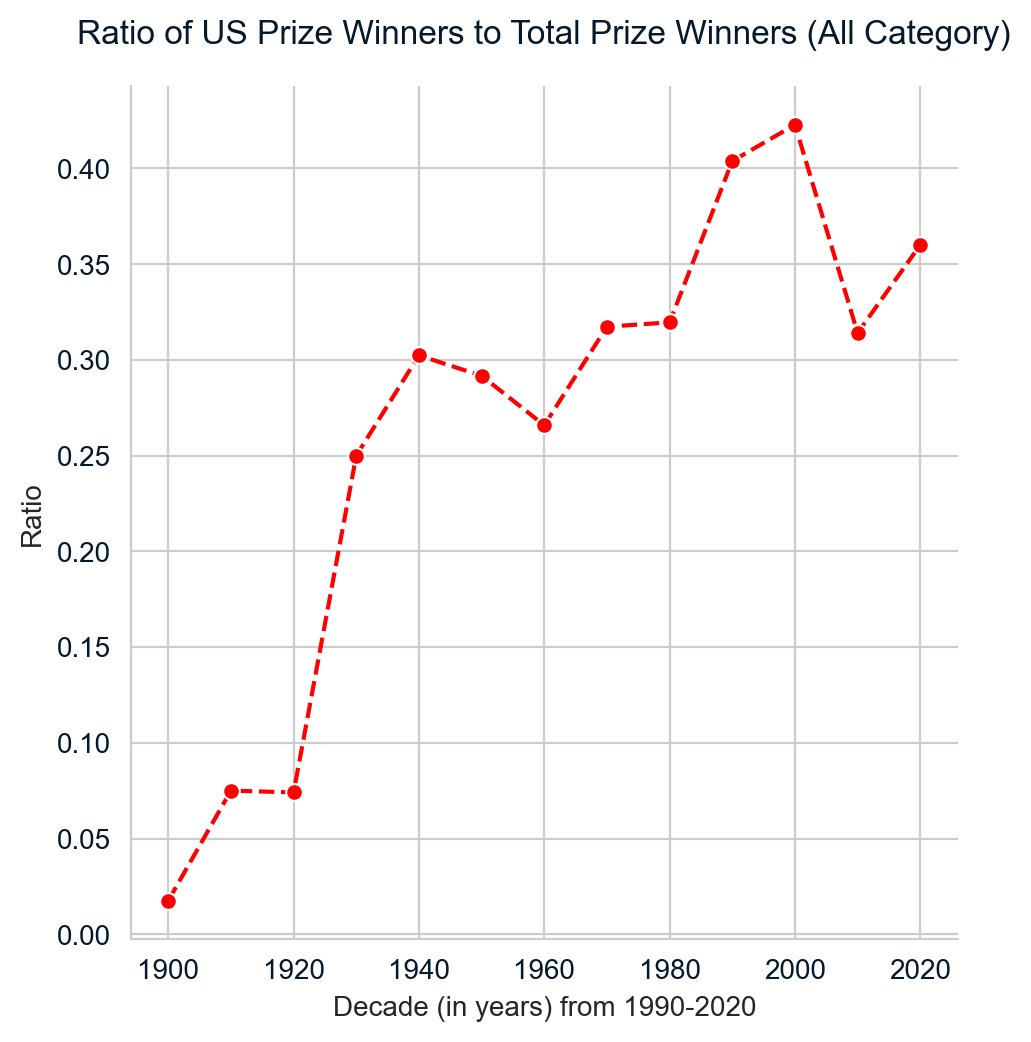

In [74]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

df['decade'] = df['year'] // 10 * 10
usa_total = df.query('birth_country=="United States of America"')['decade'].value_counts().reset_index()
all_total = df['decade'].value_counts().reset_index()
merged = all_total.merge(usa_total, on="index", how="inner", suffixes=['_all', '_usa'])
merged['ratio'] = merged['decade_usa'] / merged['decade_all']
max_decade_usa = int(merged[merged['ratio'] == merged['ratio'].max()]['index'])

sns.relplot(x='index', y='ratio', kind='line', marker="o", linestyle="--", color="red", data=merged)
plt.xlabel('Decade (in years) from 1990-2020')
plt.ylabel('Ratio')
plt.title('Ratio of US Prize Winners to Total Prize Winners (All Category)', y=1.03)
plt.show()